# Introduction

In this notebook, we will begin with the basics of regression, polynomial features, and regularisation based on a very simple, sparse data set that contains a column of `x` data and associated `y` noisy data. The data file is called `X_Y_Sinusoid_Data.csv`.

# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [2]:
ds = pd.read_csv('X_Y_Sinusoid_Data.csv')

In [3]:
ds.head()

,x,y
0,0.038571,0.066391
1,0.166776,1.027483
2,0.183153,1.245302
3,0.187359,1.004781
4,0.243116,1.264121


We will generate approximately 100 equally spaced x data points over the range of 0 to 1. Using these points, we will calculate the y-data which represents the "ground truth" (the real function) from the equation:  `y = sin(2πx)`

In [4]:
X_real = np.linspace(0, 1.0, 100)
Y_real = np.sin(2 * np.pi * X_real)

Below we will plot the sparse data (`x` vs `y`) and the calculated ("real") data.

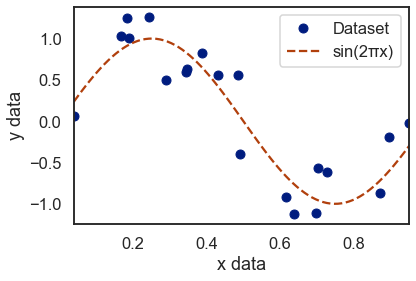

In [5]:
%matplotlib inline

sns.set_style('white')
sns.set_context('talk')
sns.set_palette('dark')

# Plot of the noisy (sparse)
ax = ds.set_index('x')['y'].plot(ls='', marker='o', label='Dataset')
ax.plot(X_real, Y_real, ls='--', marker='', label= 'sin(2πx)')

ax.legend()
ax.set(xlabel='x data', ylabel='y data');

**Next steps:**

- Using the `PolynomialFeatures` class from Scikit-learn's preprocessing library, we will create 20th order polynomial features.
- We will fit this data using linear regression.
- We will plot the resulting predicted values compared to the calculated data.

**Note:** `PolynomialFeatures` require either a dataframe (with one column, not a Series) or a 2D array of dimension (`X`, 1), where `X` is the length.

In [6]:
X = ds.drop('y', axis = 1)
y = ds.y

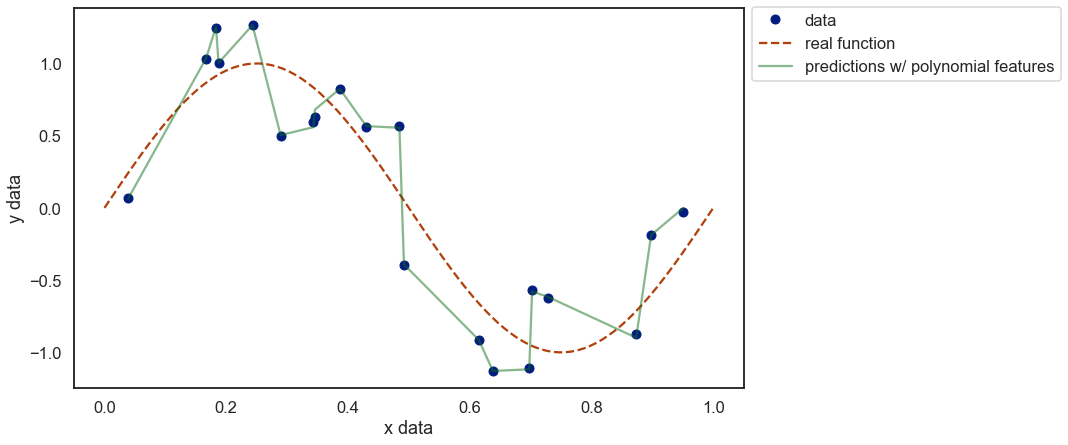

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Setup the polynomial features
degree = 20
pf = PolynomialFeatures(degree)
lr = LinearRegression()

# Extract the X- and Y- data from the dataframe 
X_data = ds[['x']]
Y_data = ds['y']

# Create the features and fit the model
X_poly = pf.fit_transform(X_data)
lr = lr.fit(X_poly, Y_data)
Y_pred = lr.predict(X_poly)

# Plot the result
plt.figure(figsize = (12,7))
plt.plot(X_data, Y_data, marker='o', ls='', label='data', alpha=1)
plt.plot(X_real, Y_real, ls='--', label='real function')
plt.plot(X_data, Y_pred, marker='', alpha=.5, label='predictions w/ polynomial features')
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1.025))
ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data');

**We will now:**
- Perform the regression on the data using polynomial features using ridge regression (α =0.001) and lasso regression (α =0.0001).
- Plot the results, as was done in Question 1.
- Also plot the magnitude of the coefficients obtained from these regressions, and compare them to those obtained from linear regression in the previous steps. The linear regression coefficients will likely need a separate plot (or their own y-axis) due to their large magnitude.

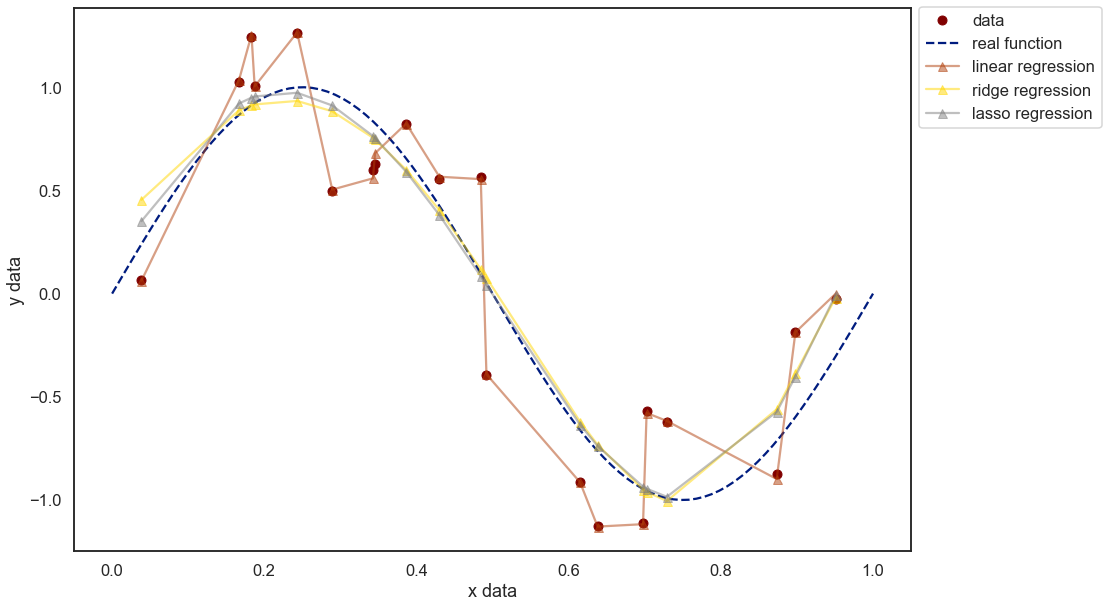

In [8]:
# Mute the sklearn warning about regularisation
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.linear_model import Ridge, Lasso

# The ridge regression model
rr = Ridge(alpha=0.001)
rr = rr.fit(X_poly, Y_data)
Y_pred_rr = rr.predict(X_poly)

# The lasso regression model
lassor = Lasso(alpha=0.0001)
lassor = lassor.fit(X_poly, Y_data)
Y_pred_lr = lassor.predict(X_poly)

# The plot of the predicted values
plt.figure(figsize = (15,10))
plt.plot(X_data, Y_data, marker='o', ls='', label='data', color = 'maroon')
plt.plot(X_real, Y_real, ls='--', label='real function')
plt.plot(X_data, Y_pred, label='linear regression', marker='^', alpha=.5)
plt.plot(X_data, Y_pred_rr, label='ridge regression', marker='^', alpha=.5, color = 'gold')
plt.plot(X_data, Y_pred_lr, label='lasso regression', marker='^', alpha=.5, color = 'grey')

plt.legend(loc = 'upper left', bbox_to_anchor = (1,1.017))

ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data');

In [9]:
# let's look at the absolute value of coefficients for each model

coefficients = pd.DataFrame()

# Ravel is not required as were only working in one dimension. If we had (20,3), this will produce
# a dimension of (60,1).

coefficients['linear regression'] = lr.coef_.ravel()
coefficients['ridge regression'] = rr.coef_.ravel()
coefficients['lasso regression'] = lassor.coef_.ravel()
coefficients = coefficients.applymap(abs) # Taking absolutes of the values

# Huge difference in scale between non-regularized vs regularized regression.
coefficients.describe()  

,linear regression,ridge regression,lasso regression
count,2.100000e+01,21.000000,21.000000
mean,5.844106e+13,2.169397,2.167284
std,5.943797e+13,2.900278,4.706731
min,1.608096e+07,0.000000,0.000000
25%,3.402975e+12,0.467578,0.000000
50%,3.651863e+13,1.017272,0.252181
75%,1.064478e+14,2.883507,1.641353
max,1.643319e+14,12.429635,20.176708


In [10]:
(coefficients>0).sum()

linear regression    21
ridge regression     20
lasso regression     15
dtype: int64

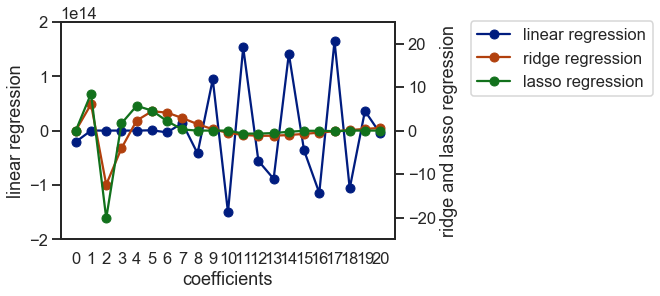

In [11]:
colors = sns.color_palette()

# Setup the dual y-axes

ax1 = plt.axes()

# We will be using the same x-values/axis (ax1) but use it with different y-values.
# The `twinx()` enables us to do that. We use ax1 and ax2 like they were different plot,
# but plot one on top of the other.

ax2 = ax1.twinx() 

# Plot the linear regression data
ax1.plot(lr.coef_.ravel(), 
         color=colors[0], marker='o', label='linear regression')

# Plot the regularisation data sets
ax2.plot(rr.coef_.ravel(), 
         color=colors[1], marker='o', label='ridge regression')

ax2.plot(lassor.coef_.ravel(), 
         color=colors[2], marker='o', label='lasso regression')

# Customize axes scales
ax1.set_ylim(-2e14, 2e14)
ax2.set_ylim(-25, 25)

# Combine the legends
h1, l1 = ax1.get_legend_handles_labels() # h1 comes from ax1
h2, l2 = ax2.get_legend_handles_labels() # h2 comes from ax2
ax1.legend(h1+h2, l1+l2, loc = 'upper left', bbox_to_anchor = (1.2,1.04))

ax1.set(xlabel='coefficients',ylabel='linear regression')
ax2.set(ylabel='ridge and lasso regression')

ax1.set_xticks(range(len(lr.coef_)));

# AMES Housing Data Set

**For the remainder of the notebook, we will be working with the AMES Housing data set.**

# Importing the dataset

In [12]:
ds = pd.read_csv('Ames_Housing_Sales.csv')

In [13]:
ds.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,None,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,None,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,None,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,None,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,None,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0


In [14]:
ds.shape

(1379, 80)

In [15]:
# Taking care of missing data

ds.isnull().sum().value_counts()

0    80
dtype: int64

# Encoding categorical data

In [16]:
# Performing one hot encoding using pd.get_dummies
# By default, this will convert any columns that of type object.

ds = pd.get_dummies(ds, drop_first = True)

In [17]:
ds.shape

(1379, 252)

# Splitting the dataset into the training set and test set

In [18]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(ds, test_size=0.3, random_state=42)

There are a number of columns that have skewed features. A log transformation can be applied to them. Note that this includes the SalePrice, our predictor. However, let's keep that one as is.

In [19]:
# Create a list of float columns to check for skewing

mask = ds.dtypes == np.float
float_cols = ds.columns[mask]

In [20]:
skew_limit = 0.75
skew_vals = train[float_cols].skew()

skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {0}'.format(skew_limit)))

skew_cols

,Skew
MiscVal,26.915364
PoolArea,15.777668
LotArea,11.501694
LowQualFinSF,11.210638
3SsnPorch,10.150612
ScreenPorch,4.599803
BsmtFinSF2,4.466378
EnclosedPorch,3.218303
LotFrontage,3.138032
MasVnrArea,2.492814


Transform all the columns where the skew is greater than 0.75, excluding "SalePrice".

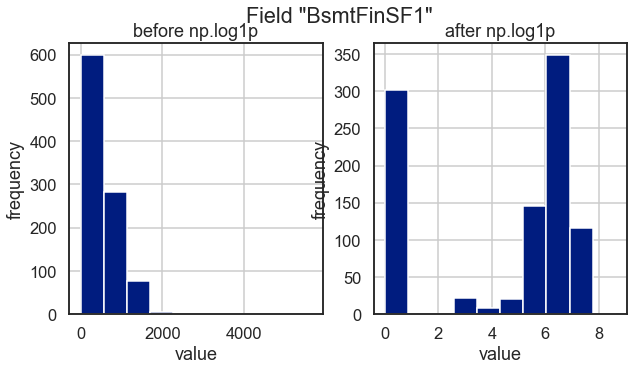

In [21]:
# Let's look at what happens to one of these features, when we apply np.log1p visually.

field = "BsmtFinSF1" # Feature with name BsmtFinSF1
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))
train[field].hist(ax=ax_before)
train[field].apply(np.log1p).hist(ax=ax_after)
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value');
fig.suptitle('Field "{}"'.format(field));

# Comparing the before and after, we observe that the skewness is a little bit better.

In [22]:
# Mute the setting wtih a copy warnings
pd.options.mode.chained_assignment = None

for col in skew_cols.index.tolist():
    if col == "SalePrice": # Every columns except the SalesPrice column
        continue
    train[col] = np.log1p(train[col])
    test[col]  = test[col].apply(np.log1p)  # Same thing

Seperate features from the predictor.

In [23]:
feature_cols = [x for x in train.columns if x != 'SalePrice']
X_train = train[feature_cols]
y_train = train['SalePrice']

X_test  = test[feature_cols]
y_test  = test['SalePrice']

We will analyse the `Root Mean Squared Error`. We will write a function **`rmse`** that takes in truth and prediction values and returns the Root Mean Squared Error.

In [24]:
# Using sklearn's mean_squared_error.

from sklearn.metrics import mean_squared_error

In [25]:
def rmse(y_test, y_pred):
    return(np.sqrt(mean_squared_error(y_test, y_pred)))

**Next steps:**

- Fit a basic linear regression model.
- Print the Root Mean Squared Error for this model.
- Plot the predicted vs actual sale price based on the model.

In [26]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression().fit(X_train, y_train)

linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))

print(linearRegression_rmse)

78601.29338615369


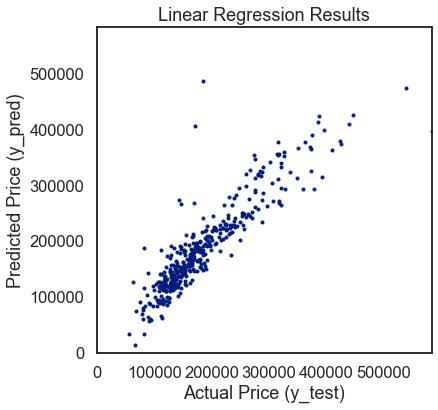

In [27]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, linearRegression.predict(X_test), 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Price (y_test)', 
       ylabel='Predicted Price (y_pred)', 
       xlim=lim,
       ylim=lim,
       title='Linear Regression Results');

# Ridge Regression

Ridge regression uses L2 normalisation to reduce the magnitude of the coefficients. This can be helpful in situations where there is high variance. The regularisation functions in Scikit-learn each contain versions that have cross-validation built in.

**We will now:** 

- Fit a regular (non-cross validated) Ridge model to a range of α values and plot the RMSE using the cross validated error function we created above.

- Use

        [0.005,0.05,0.1,0.3,1,3,5,10,15,30,80]
 
    as the range of alphas.

- Repeat the fitting of the Ridge models using the range of α values from the prior section and compare the results.

- For the `RidgeCV` method, it's not possible to get the alpha values for the models that weren't selected, unfortunately. The resulting error values and α values are very similar to those obtained above.

# Cross Validation - Optimum Parameters

In [28]:
from sklearn.linear_model import RidgeCV

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(X_train, y_train)

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))

print(ridgeCV.alpha_, ridgeCV_rmse)

10.0 32040.433237817015


Much like the `RidgeCV` function, there is also a `LassoCV` function that uses an L1 regularisation function and cross-validation. L1 regularisation will selectively shrink some coefficients, effectively performing feature elimination.

The `LassoCV` function does not allow the scoring function to be set. However, the custom error function (`rmse`) created above can be used to evaluate the error on the final model.

Similarly, there is also an elastic net function with cross validation, `ElasticNetCV`, which is a combination of L2 and L1 regularisation.

We will fit a Lasso model using cross validation and determine the optimum value for α and the RMSE using the function created above. 

**Note:** That the magnitude of α may be different from the Ridge model.

We will also repeat this with the Elastic net model, comparing the results via a table and/or plot.

We will be using the following alphas:

`[1e-5, 5e-5, 0.0001, 0.0005, 0.1, 1, 5, 50, 80, 100, 120, 140, 160, 180]`

In [29]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005, 0.1, 1, 5, 50, 80, 100, 120, 140, 160, 180])

lassoCV = LassoCV(alphas=alphas2, max_iter=5e4, cv=4).fit(X_train, y_train)

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))

# Lasso is slower as it uses gradient descent, therefore specifying max_iter.

print(lassoCV.alpha_, lassoCV_rmse)

140.0 36113.17372634536


We can determine how many of these features remain non-zero.

In [30]:
print('Of {} coefficients, {} are non-zero with Lasso.'.format(len(lassoCV.coef_), 
                                                               len(lassoCV.coef_.nonzero()[0])))

Of 251 coefficients, 94 are non-zero with Lasso.


We will try the elastic net, with the same alphas as in Lasso, and l1_ratios between 0.1 and 0.9

In [31]:
from sklearn.linear_model import ElasticNetCV

l1_ratios = np.linspace(0.1, 0.9, 9) # The extra hyperparameter for ElasticNet

elasticNetCV = ElasticNetCV(alphas=alphas2, 
# Attribute a portion of the lambda value to the Ridge and a portion to the absolute value of the cost function
# 0.1 => more weight on Ridge, 0.9 => more weight on Lasso.
                            l1_ratio=l1_ratios,  
                            max_iter=1e4).fit(X_train, y_train)
elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)

0.1 0.9 32052.1771299433


The comparison of the RMSE calculations from all the models is summarised by the table below.

In [32]:
rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df

,RMSE
Linear,78601.293386
Ridge,32040.433238
Lasso,36113.173726
ElasticNet,32052.177130


We can also make a plot of actual vs predicted housing prices as before.

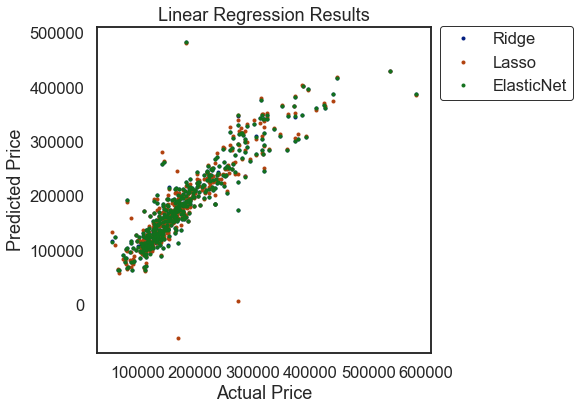

In [33]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

labels = ['Ridge', 'Lasso', 'ElasticNet']

models = [ridgeCV, lassoCV, elasticNetCV]

for mod, lab in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test), 
             marker='o', ls='', ms=3.0, label=lab)


leg = plt.legend(frameon=True, loc = 'upper left', bbox_to_anchor = (1,1.03))
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       title='Linear Regression Results');

Let's explore Stochastic gradient descent. Recall that Linear models in general are sensitive to scaling, however, SGD is highly sensitive to scaling. Moreover, a high value of learning rate can cause the algorithm to diverge, whereas a too low value may take too long to converge.

**Steps:**

- Fit a stochastic gradient descent model without a regularisation penalty (the relevant parameter is `penalty`).
- Now fit stochastic gradient descent models with each of the three penalties (L2, L1, Elastic Net) using the parameter values determined by cross validation above.
- Do not scale the data before fitting the model.
- Compare the results to those obtained without using stochastic gradient descent.

In [34]:
# Import SGDRegressor and prepare the parameters

from sklearn.linear_model import SGDRegressor

model_parameters_dict = {
    'Linear': {'penalty': 'none'},
    'Lasso': {'penalty': 'l2',
           'alpha': lassoCV.alpha_},
    'Ridge': {'penalty': 'l1',
           'alpha': ridgeCV_rmse},
    'ElasticNet': {'penalty': 'elasticnet', 
                   'alpha': elasticNetCV.alpha_,
                   'l1_ratio': elasticNetCV.l1_ratio_}
}

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test))

rmse_df['RMSE-SGD'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD
Linear,78601.293386,6.039150e+14
Ridge,32040.433238,1.058232e+16
Lasso,36113.173726,2.521753e+15
ElasticNet,32052.177130,2.367294e+15


Notice how high the error values are! The algorithm is diverging. This can be due to scaling and/or learning rate being too high. Let's adjust the learning rate and see what happens.

**We will now:**

- Pass in `eta0=1e-7` when creating the instance of `SGDClassifier`.
- Re-compute the errors for all the penalties and compare.

In [35]:
# Import SGDRegressor and prepare the parameters

from sklearn.linear_model import SGDRegressor

model_parameters_dict = {
    'Linear': {'penalty': 'none'},
    'Lasso': {'penalty': 'l2',
           'alpha': lassoCV.alpha_},
    'Ridge': {'penalty': 'l1',
           'alpha': ridgeCV_rmse},
    'ElasticNet': {'penalty': 'elasticnet', 
                   'alpha': elasticNetCV.alpha_,
                   'l1_ratio': elasticNetCV.l1_ratio_}
}

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(eta0=1e-7, **parameters)
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test))

rmse_df['RMSE-SGD-learningrate'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD,RMSE-SGD-learningrate
Linear,78601.293386,6.039150e+14,74086.962462
Ridge,32040.433238,1.058232e+16,77901.135323
Lasso,36113.173726,2.521753e+15,74032.394916
ElasticNet,32052.177130,2.367294e+15,73653.584631


Now let's scale our training data and try again.

- Fit a `MinMaxScaler` to `X_train` create a variable `X_train_scaled`.
- Using the scaler, transform `X_test` and create a variable `X_test_scaled`.
Apply the same versions of SGD to them and compare the results. Don't pass in a eta0 this time.

In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train_scaled, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test_scaled))

rmse_df['RMSE-SGD-scaled'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD,RMSE-SGD-learningrate,RMSE-SGD-scaled
Linear,78601.293386,6.039150e+14,74086.962462,32363.150210
Ridge,32040.433238,1.058232e+16,77901.135323,77749.014074
Lasso,36113.173726,2.521753e+15,74032.394916,77346.967081
ElasticNet,32052.177130,2.367294e+15,73653.584631,32217.801496


In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train_scaled, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test_scaled))

rmse_df['RMSE-SGD-scaled'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD,RMSE-SGD-learningrate,RMSE-SGD-scaled
Linear,78601.293386,6.039150e+14,74086.962462,32242.720296
Ridge,32040.433238,1.058232e+16,77901.135323,77753.467027
Lasso,36113.173726,2.521753e+15,74032.394916,77354.710261
ElasticNet,32052.177130,2.367294e+15,73653.584631,32929.564878
